In [51]:
import scipy.io as sio
import soundfile, sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
#Locals().clear()
from numpy import abs, arange, array
from scipy.signal import freqz as fz
from matplotlib.pyplot import figure, close
#matplotlib.rcParams["text.usetex"] = True
close('all')


f0 = 1053
fe = 4000
nu0 = f0/fe
duree = 0.5
sa_n = np.arange(0, duree*fe)
sa_amp = np.sin(2*np.pi*nu0*sa_n)

sd.play(sa_amp, fe)
sd.wait()

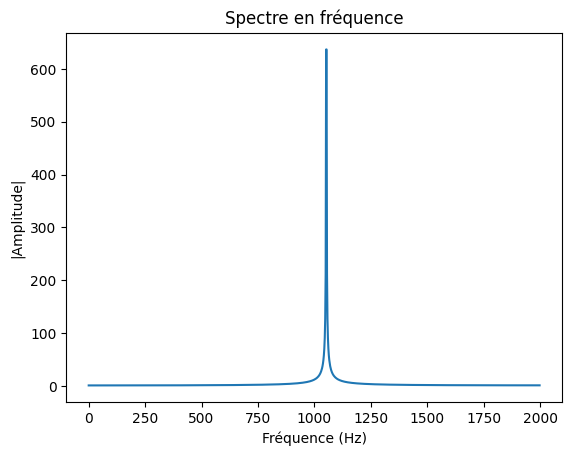

In [10]:
from scipy.fft import fft, fftfreq

N = len(sa_amp)
Sig = fft(sa_amp)
frequencies = fftfreq(N, 1/fe)

plt.plot(frequencies[:N//2], np.abs(Sig[:N//2]))
plt.title("Spectre en fréquence")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("|Amplitude|")
plt.show()

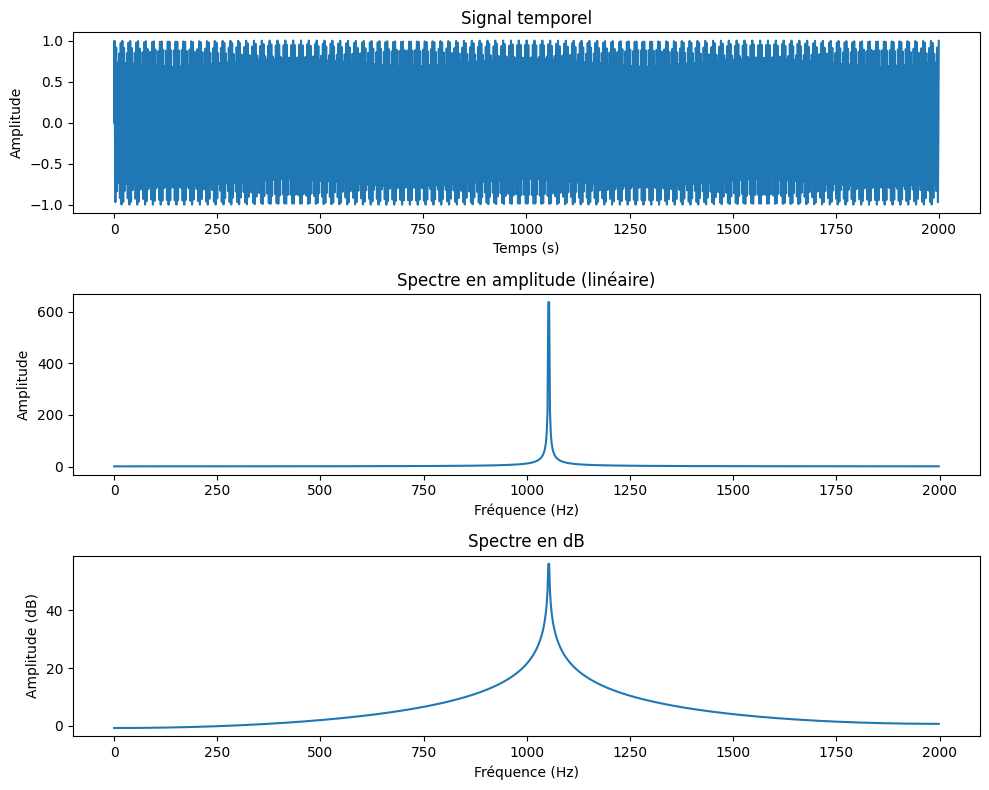

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Signal temporel
plt.subplot(3, 1, 1)
t=np.linspace(0, 2000, N)
plt.plot(t, sa_amp)
plt.title("Signal temporel")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

# TFD linéaire
plt.subplot(3, 1, 2)
plt.plot(frequencies[:N//2], np.abs(Sig[:N//2]))
plt.title("Spectre en amplitude (linéaire)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")

# TFD en dB
plt.subplot(3, 1, 3)
plt.plot(frequencies[:N//2], 20 * np.log10(np.abs(Sig[:N//2]) + 1e-6))
plt.title("Spectre en dB")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude (dB)")

plt.tight_layout()
plt.show()

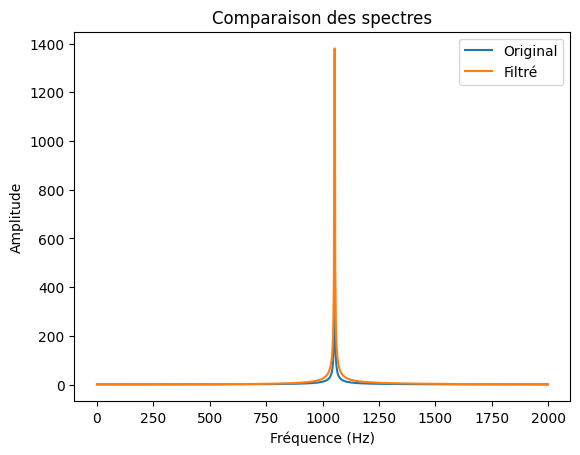

In [12]:
#p4
from scipy.signal import lfilter

b = [1, -2, 1]  # coefficients du filtre H(z)
sig2 = lfilter(b, 1, sa_amp)  # signal filtré

# Calculer la TFD de sig2
Sig2 = fft(sig2)

# Tracer la comparaison
plt.plot(frequencies[:N//2], np.abs(Sig[:N//2]), label="Original")
plt.plot(frequencies[:N//2], np.abs(Sig2[:N//2]), label="Filtré")
plt.legend()
plt.title("Comparaison des spectres")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.show()

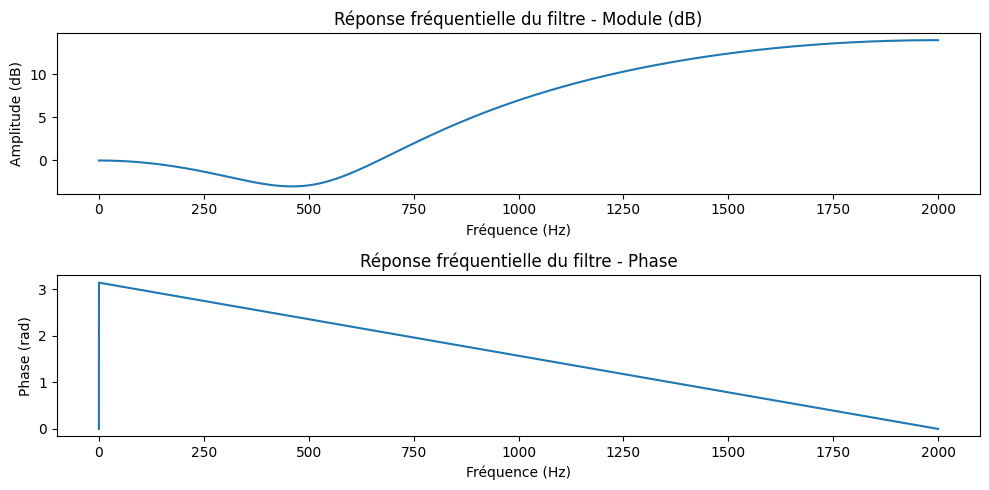

In [13]:
#p5
from scipy.signal import freqz

w, h = freqz(b, worN=8000, fs=fe)
plt.figure(figsize=(10, 5))

# Module
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h+1)))
plt.title("Réponse fréquentielle du filtre - Module (dB)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude (dB)")

# Phase
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h))
plt.title("Réponse fréquentielle du filtre - Phase")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Phase (rad)")

plt.tight_layout()
plt.show()

In [142]:
import soundfile as sf
audio,fe  = sf.read(r'C:\Users\mathe\Desktop\TNS TP\Sources\Yunta.wav')
#sd.play(audio, fe)
sd.wait()

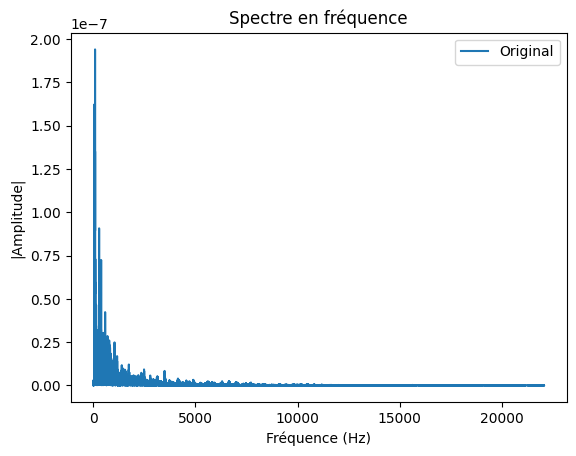

In [143]:
#TFD de audio
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

audio = audio.mean(axis=1)
N = len(audio)
Audio = 1/(fe*N)*fft.fft(audio)
frequencies = fft.fftfreq(N, 1/fe)

plt.plot(frequencies[:N//2], np.abs(Audio[:N//2]), label="Original")
plt.title("Spectre en fréquence")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("|Amplitude|")
plt.legend()
plt.show()

#plt.savefig("Résultats/Spectre de Yunta.wav")

On voit une concentration des "pics" autour de la fréquence du signal ~1053 Hz. On va donc essayer de zoomer autour.

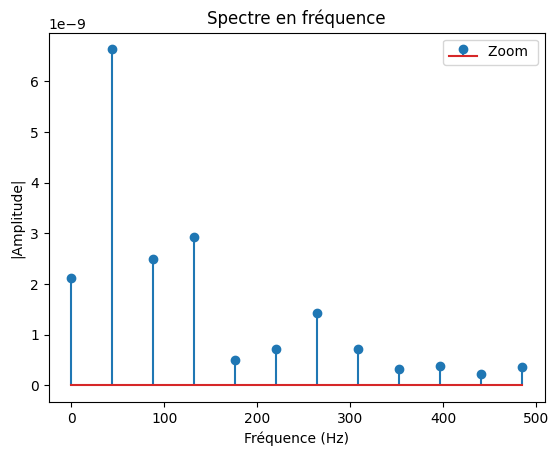

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

nobs =1000
Nobs= np.arange(0, nobs)


audio = audio[Nobs]
N2 = len(audio)
Audio = 1/(fe*N2) * fft.fft(audio)
frequencies = fft.fftfreq(N2, 1/fe)
filtre = (frequencies>=0) & (frequencies<=500)

#plt.stem(frequencies[:N2//2], np.abs(Audio[:N2//2]), label="Original")

plt.stem(frequencies[filtre], np.abs(Audio[filtre]), label = 'Zoom ')
plt.title("Spectre en fréquence")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("|Amplitude|")
plt.legend()
plt.show()





On voit bien que dans cette zone, on a les amplitudes les plus élevées.

**PARTIE III.2.3 De l'influence de la fréquence d'échantillonnge**


**PARTIE III.2.4 Un filtre numérique basique : le retard**


On a vu qu'un retard de 1 échantillon pouvait se noter :

$y[n] = z^{-1}\times x[n]$

d'où la fonction de transfert en z : $H[n] = z^{-n_{0}}$

donc on a
$h[n] = \delta(n-n_{0})$


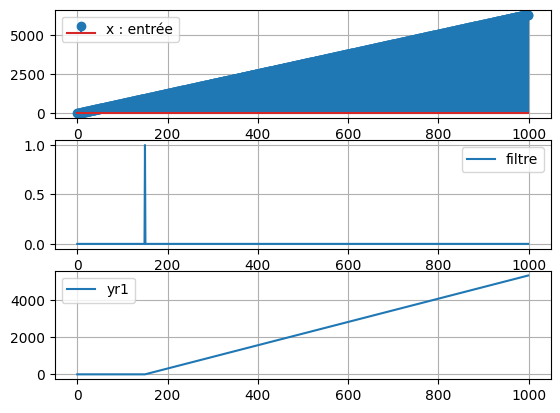

<Figure size 640x480 with 0 Axes>

In [128]:
import numpy as np
import matplotlib.pyplot as plt

f0 = 1
N = 1000
#On s'intéresse à une entrée en créneau (rapport cyclique de 0.5)
motif=np.concatenate([np.ones(50), np.zeros(50)])
x2 = np.tile(motif, int(N/100))
def x(t):
    return 2*np.pi*f0*t

n0 = 150 #3 périodes de retard
def hr(n):
    return np.where(n==n0, 1, 0)

t = np.arange(0, N)
x=x(t)
#Systeme LTI donc on peut utiliser cette formule
yr1 = np.convolve(x, hr(t), mode='full')

#On affiche les 3 graphes
plt.subplot(3, 1, 1)
plt.stem(t, x, label="x : entrée" )
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(t, hr(t), label="filtre")
plt.legend()
plt.grid(True)


t_y = np.arange(0, len(yr1))
plt.subplot(3, 1, 3)
plt.plot(t, yr1[t], label="yr1")
plt.legend()
plt.grid(True)
plt.show()

plt.tight_layout()
plt.savefig(r"C:\Users\mathe\Desktop\TNS TP\Résultats\Filtre basique : retard n0.png")



On choisit un signal créneau en entrée. On applique le filtre qui entraine un retard de n0 échantillons. On constate bien que la sortie est retardée de n0 échantillons. On a pu utiliser convolve car notre choix du signal d'entrée (créneau) est linéaire, et invariant temporellement (LTI).

**PARTIE III.2.5 : Un effet hypercompliqué à réaliser en analogique et trivial en numérique : l'écho**

**PARTIE III.2.6 : Retour sur la séquence audio, le signal audio source**